<h1><b><font color = black><a id='division_ID0'>2001 - 2010 INDIA POLICE HOUSING STATISTICS</a></font></b></h1><br>
<b>Built by Arijit Roy, Arkadeep Roy, Soumodip Ghosh, Ankita Datta, Shayani Das</b>
<br><b>Guidance - Indranil Das, Technical Analyst, Webskitters Academy</b>
<br><b>In Association with Webskitters Academy</b>
<br><b>Hooghly Engineering & Technology College</b>

<p><b>Download Dataset Dependency - <a href = "https://drive.google.com/drive/folders/178cPQpM635fN_dwG8XByLwA6gpLu6IaW?usp=sharing">Click here</a></b></p>

<h3><b>Contents</b></h3>

[Data Collection](#division_ID1) | [Data Preprocessing](#division_ID2) | [Data Visualization](#division_ID3)

<h2><a id='division_ID1'>Data Collection</a></h2>

[MENU](#division_ID0)

In [1]:
# import dataset from local repository
import pandas as pd
df = pd.read_csv('police_housing.csv', warn_bad_lines = False, error_bad_lines = False)
df

,Area_Name,Year,Group_Name,Sub_Group_Name,PH_Houses_Provided_by_Department,PH_Houses_provided_on_LeaseRentGPRA,PH_Sanctioned_Strength
0,Andaman & Nicobar Islands,2001,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),7.0,NaN,17
1,Andhra Pradesh,2001,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),102.0,189.0,569
2,Arunachal Pradesh,2001,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),81.0,11.0,92
3,Assam,2001,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),0.0,0.0,531
4,Bihar,2001,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),130.0,89.0,222
...,...,...,...,...,...,...,...
691,Tamil Nadu,2010,PH_Upper Subordinates (A.S.I. to Inspectors),2. Upper SubOrdinates (ASI to Inspectos),373.0,0.0,12039
692,Tripura,2010,PH_Upper Subordinates (A.S.I. to Inspectors),2. Upper SubOrdinates (ASI to Inspectos),326.0,NaN,2128
693,Uttar Pradesh,2010,PH_Upper Subordinates (A.S.I. to Inspectors),2. Upper SubOrdinates (ASI to Inspectos),5342.0,2654.0,21971
694,Uttarakhand,2010,PH_Upper Subordinates (A.S.I. to Inspectors),2. Upper SubOrdinates (ASI to Inspectos),596.0,NaN,1152


<h2><a id='division_ID2'>Data Preprocessing</a></h2>

[MENU](#division_ID0)

In [2]:
# check null values in the dataset
df.isnull().sum()

Area_Name                                0
Year                                     0
Group_Name                               0
Sub_Group_Name                           0
PH_Houses_Provided_by_Department        27
PH_Houses_provided_on_LeaseRentGPRA    204
PH_Sanctioned_Strength                   0
dtype: int64

In [3]:
# fill the null values with 0
df.fillna(0, inplace = True)

In [4]:
# drop unneccesary columns
df.drop(['Group_Name', 'Sub_Group_Name'], axis = 1, inplace = True)

In [5]:
# change datatypes to int
df.iloc[:, -3] = df.iloc[:, -3].astype(int)
df.iloc[:, -2] = df.iloc[:, -2].astype(int)
df.iloc[:, -1] = df.iloc[:, -1].astype(int)

<h2><a id='division_ID3'>Data Visualization</a></h2>

[MENU](#division_ID0)

- <h3><b>2001 - 2010 Total Statewise Police Housing</b></h3>

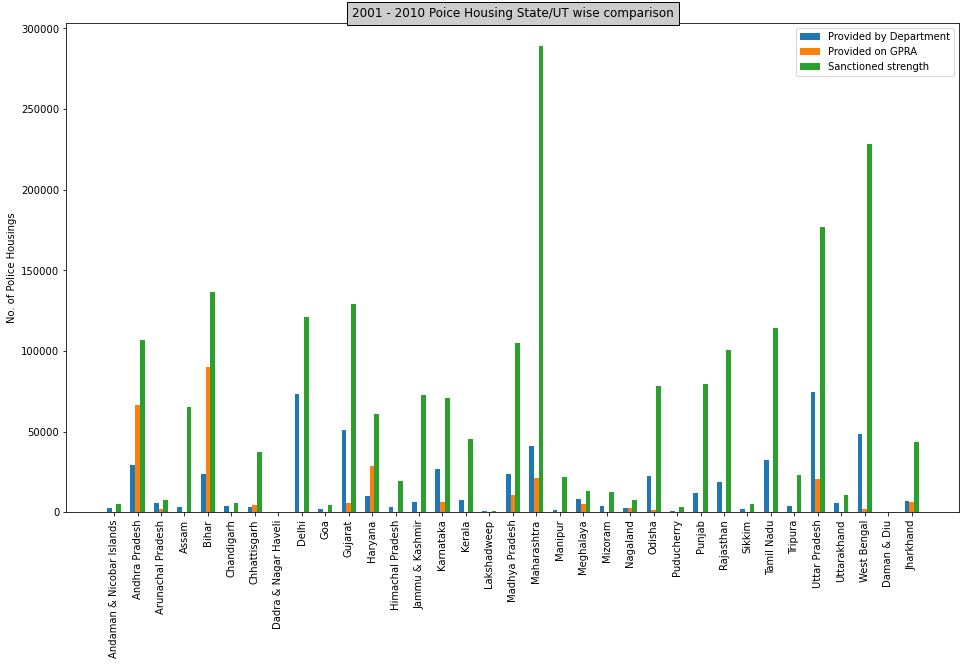

In [6]:
import matplotlib.pyplot as plt
import numpy as np
areas = df.iloc[:, 0].unique()
housings1 = []
housings2 = []
housings3 = []
for i in areas:
    housings1.append(df[df.iloc[:, 0] == i].iloc[:, -1].sum())
    housings2.append(df[df.iloc[:, 0] == i].iloc[:, -2].sum())
    housings3.append(df[df.iloc[:, 0] == i].iloc[:, -3].sum())
r = np.arange(len(areas))
w = 0.2
plt.figure(figsize = (16, 9))
plt.bar(r, housings3, width = w)
plt.bar(r+w, housings2, width = w)
plt.bar(r+w*2, housings1, width = w)
plt.xticks(r+w, areas, rotation = 90)
plt.title('2001 - 2010 Poice Housing State/UT wise comparison', bbox = {'facecolor': '0.8', 'pad': 5}, loc = 'center')
plt.ylabel('No. of Police Housings')
plt.legend(['Provided by Department', 'Provided on GPRA', 'Sanctioned strength'])
plt.show()

- <h3><b>2001 - 2010 Yearwise Police Housing</b></h3>

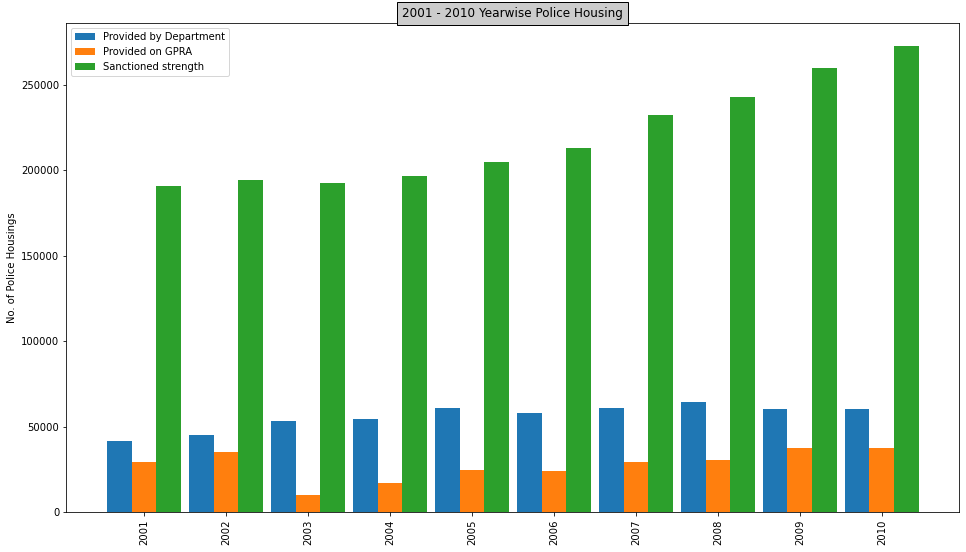

In [7]:
timeline = df.iloc[:, 1].unique()
cat1 = []
cat2 = []
cat3 = []
for i in timeline:
    cat1.append(df[df.iloc[:, 1] == i].iloc[:, -1].sum())
    cat2.append(df[df.iloc[:, 1] == i].iloc[:, -2].sum())
    cat3.append(df[df.iloc[:, 1] == i].iloc[:, -3].sum())
r = np.arange(len(timeline))
w = 0.3
plt.figure(figsize = (16, 9))
plt.bar(r, cat3, width = w)
plt.bar(r+w, cat2, width = w)
plt.bar(r+w*2, cat1, width = w)
plt.xticks(r+w, timeline, rotation = 90)
plt.ylabel('No. of Police Housings')
plt.title('2001 - 2010 Yearwise Police Housing', bbox = {'facecolor': '0.8', 'pad': 5}, loc = 'center')
plt.legend(['Provided by Department', 'Provided on GPRA', 'Sanctioned strength'])
plt.show()

- <h3><b>2001 - 2010 Statewise & Yearwise Police Housing</b></h3>

In [8]:
def plot_details(state_name):
    new = df[df.iloc[:, 0] == state_name].iloc[:, ]
    cat1 = []
    cat2 = []
    cat3 = []
    for i in timeline:
        cat1.append(new[new.iloc[:, 1] == i].iloc[:, -1].sum())
        cat2.append(new[new.iloc[:, 1] == i].iloc[:, -2].sum())
        cat3.append(new[new.iloc[:, 1] == i].iloc[:, -3].sum())
    r = np.arange(len(timeline))
    w = 0.3
    plt.figure(figsize = (16, 9))
    plt.bar(r, cat3, width = w)
    plt.bar(r+w, cat2, width = w)
    plt.bar(r+w*2, cat1, width = w)
    plt.xticks(r+w, timeline, rotation = 90)
    plt.ylabel('No. of Police Housings')
    plt.title(state_name + ' 2001 - 2010 Yearwise Police Housing', bbox = {'facecolor': '0.8', 'pad': 5}, loc = 'center')
    plt.legend(['Provided by Department', 'Provided on GPRA', 'Sanctioned strength'])
    plt.show()

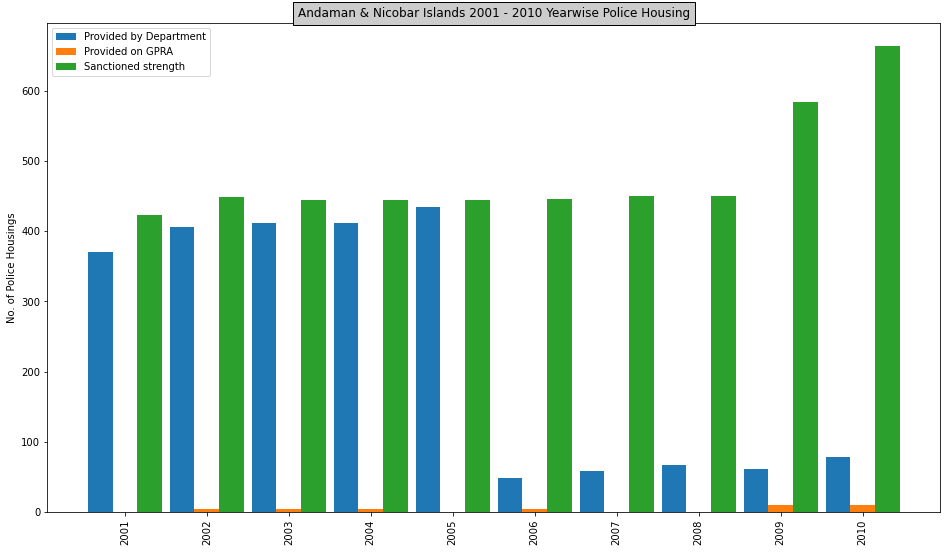

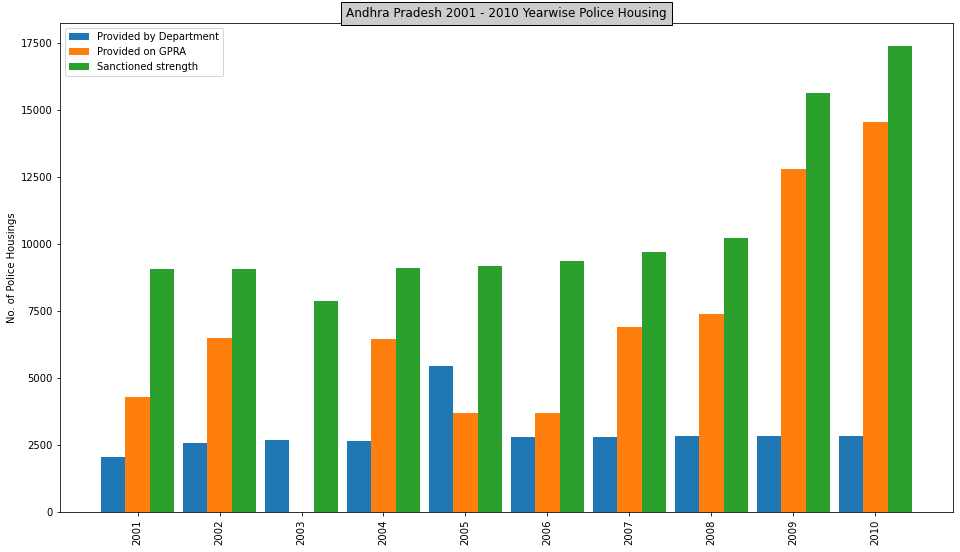

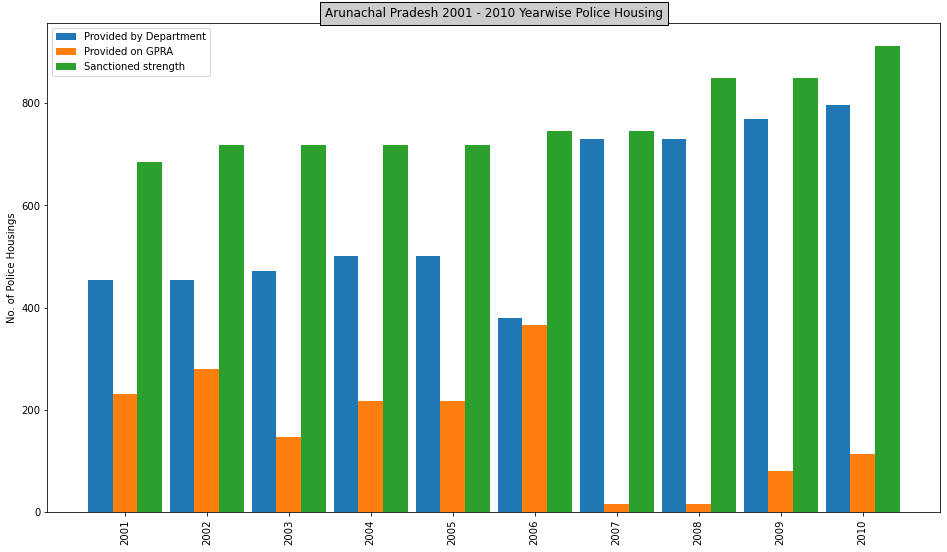

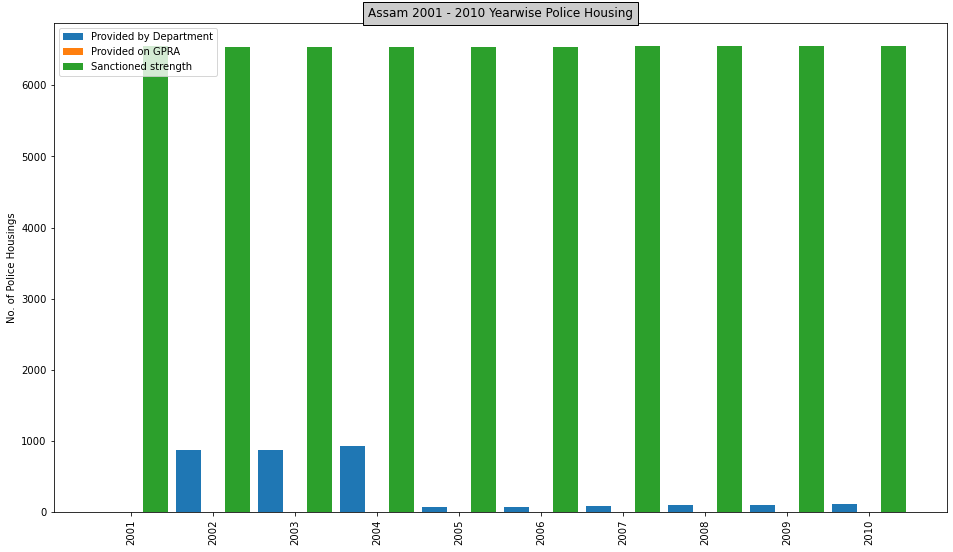

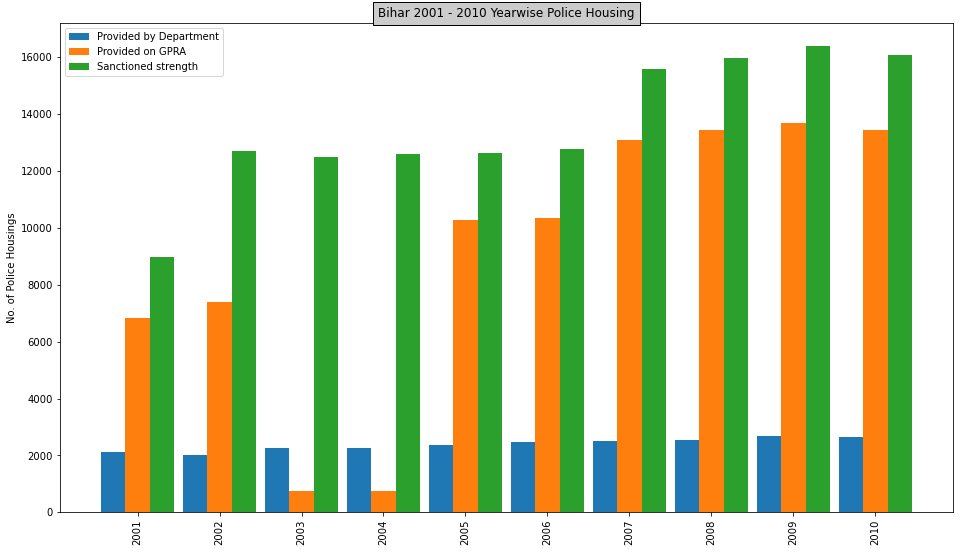

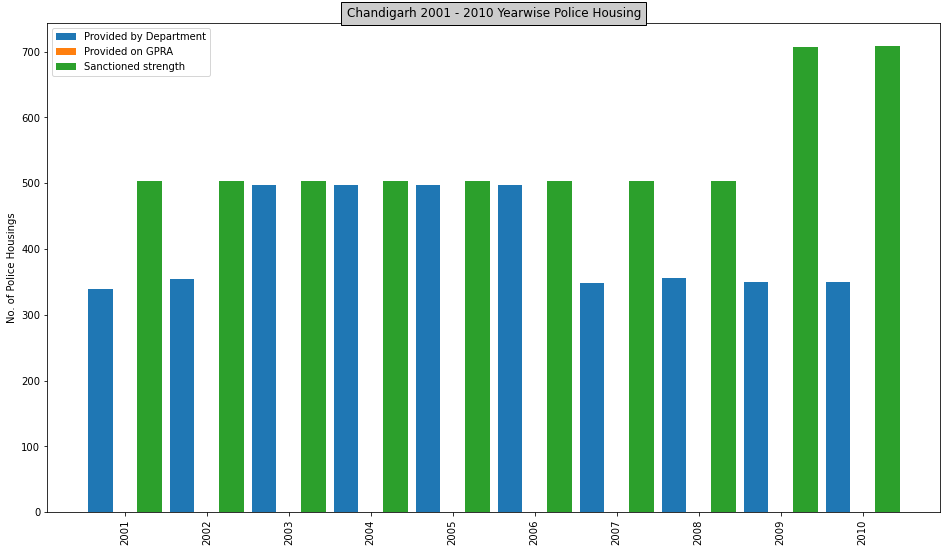

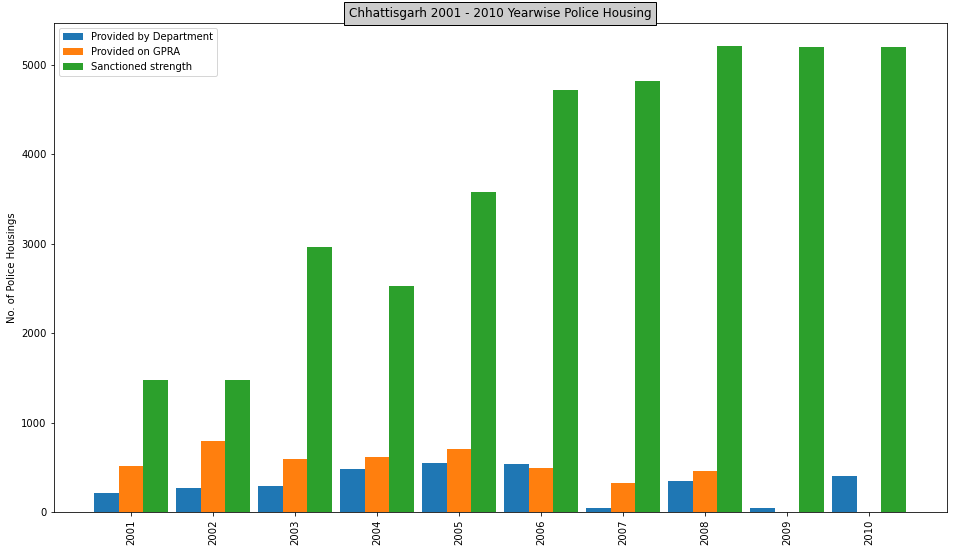

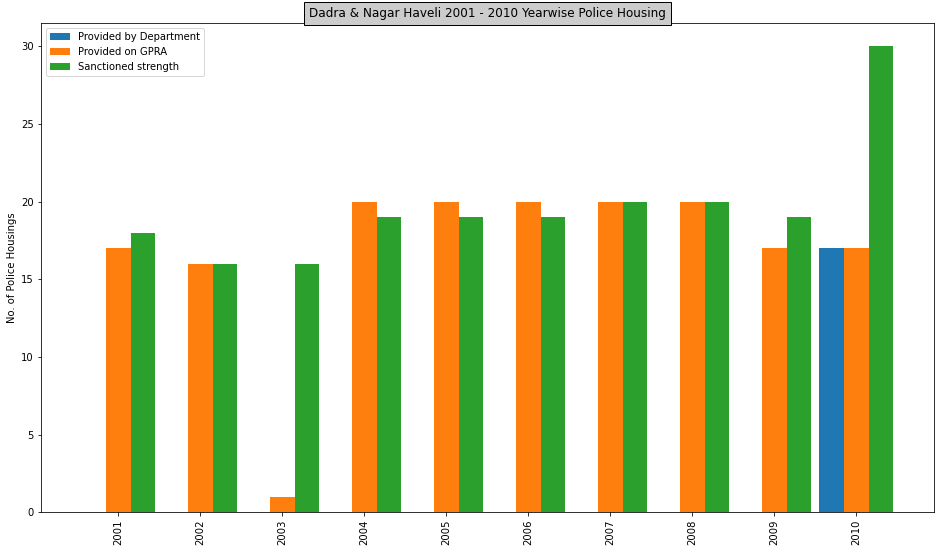

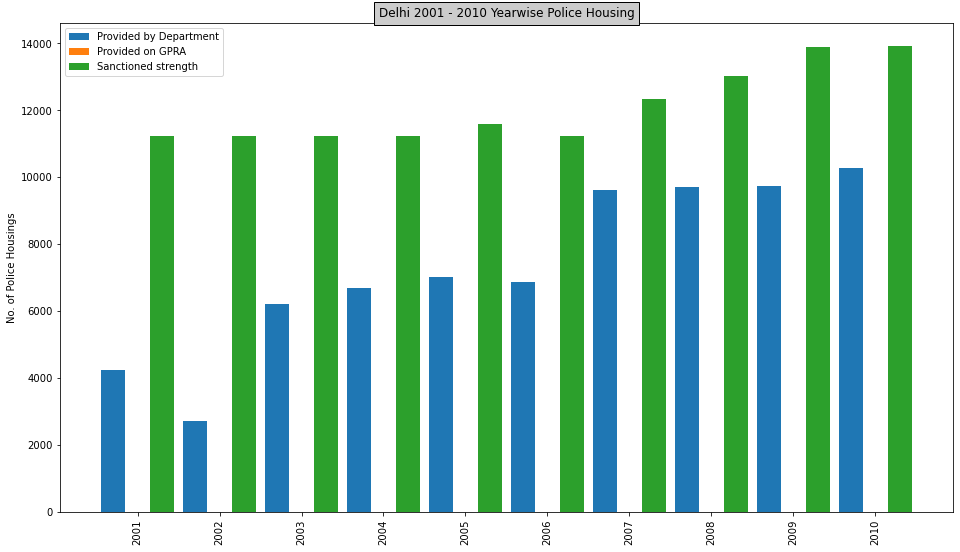

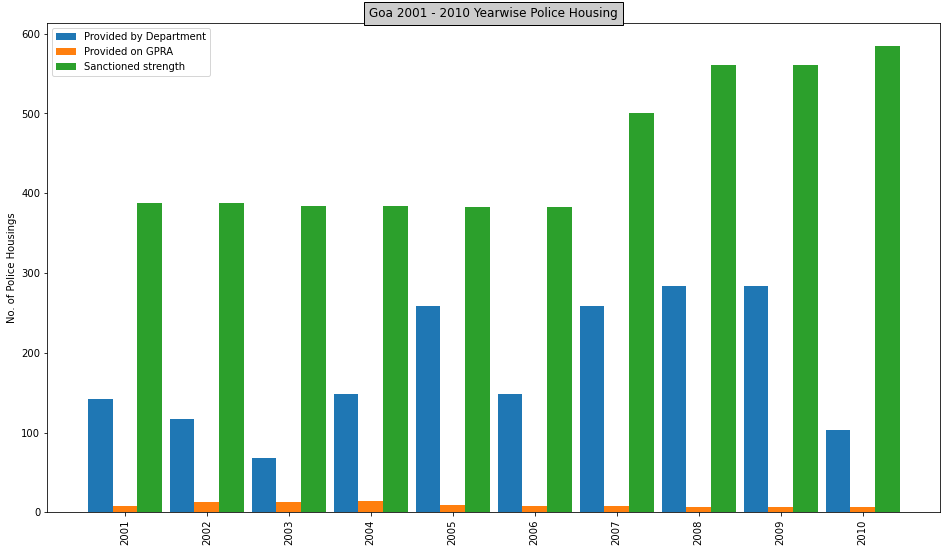

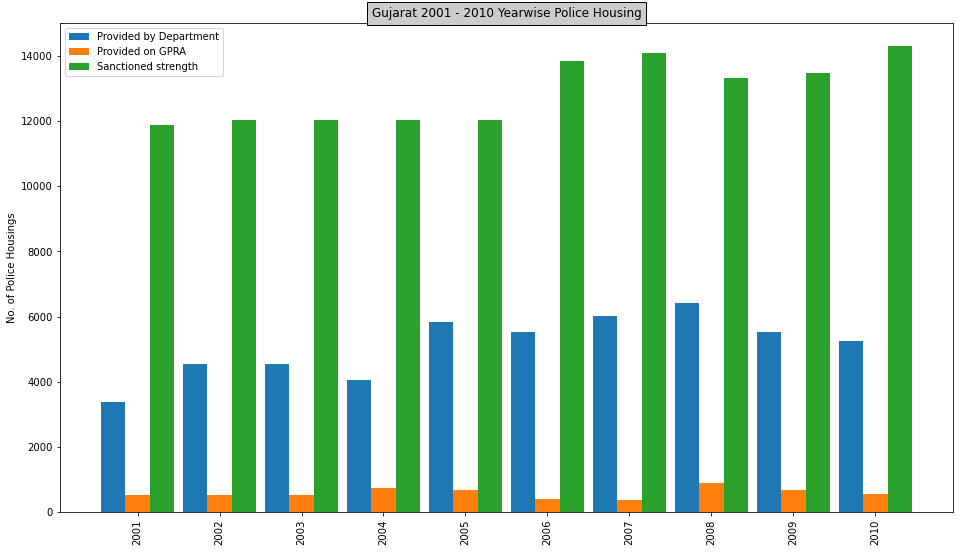

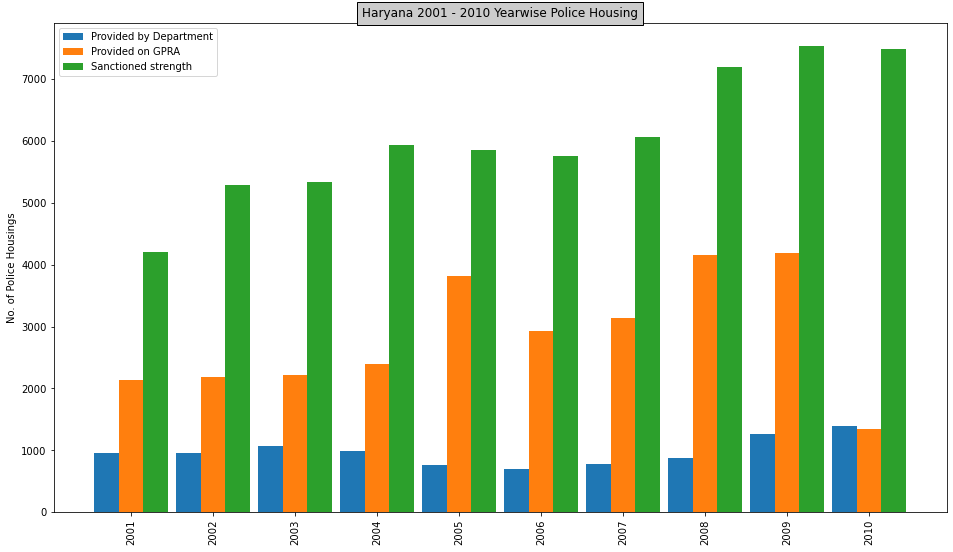

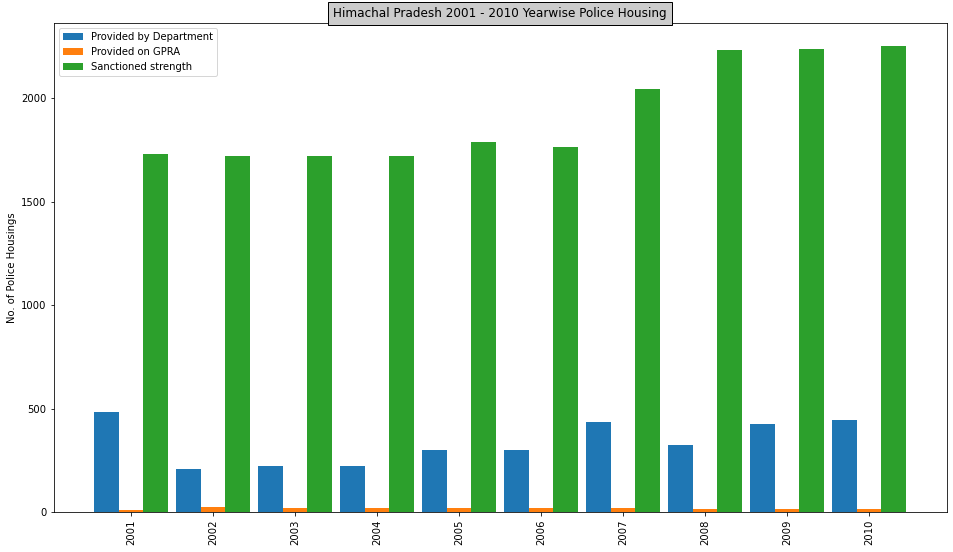

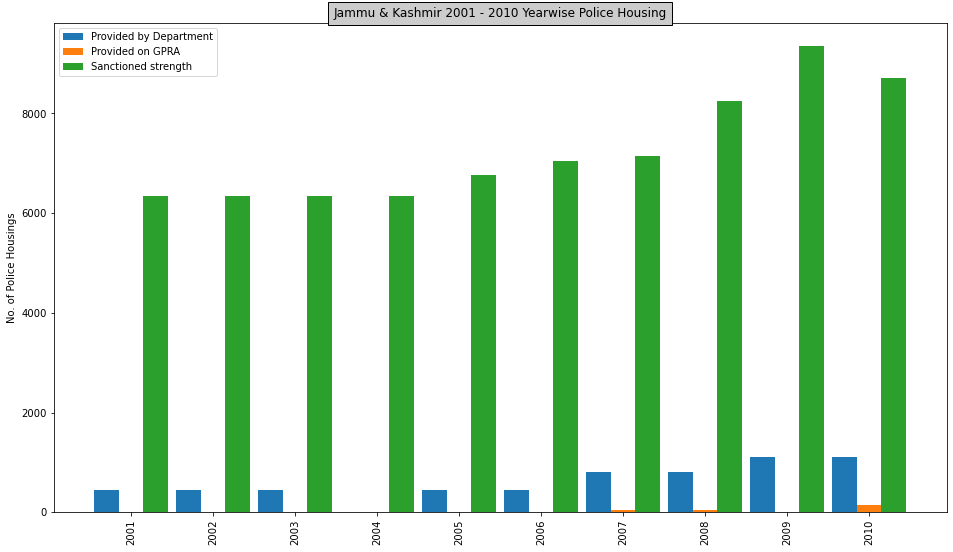

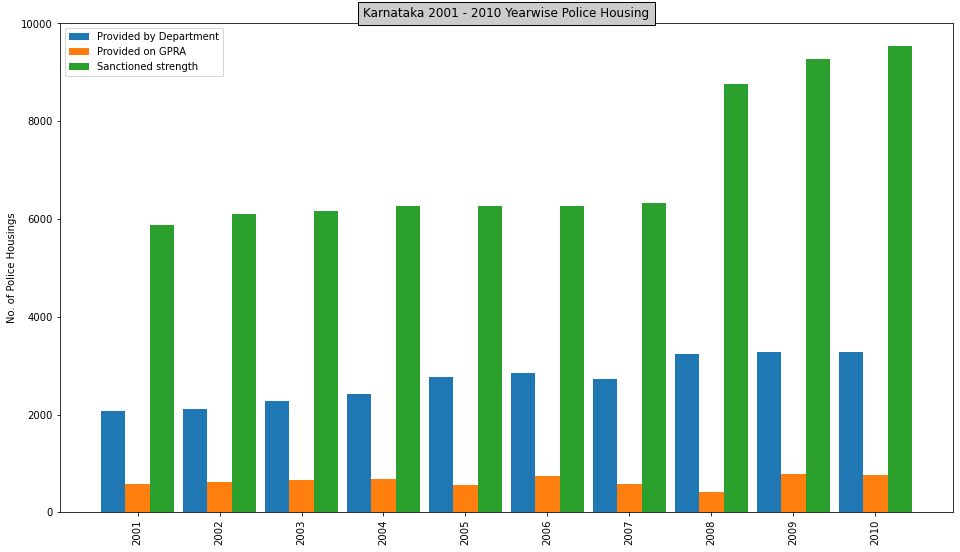

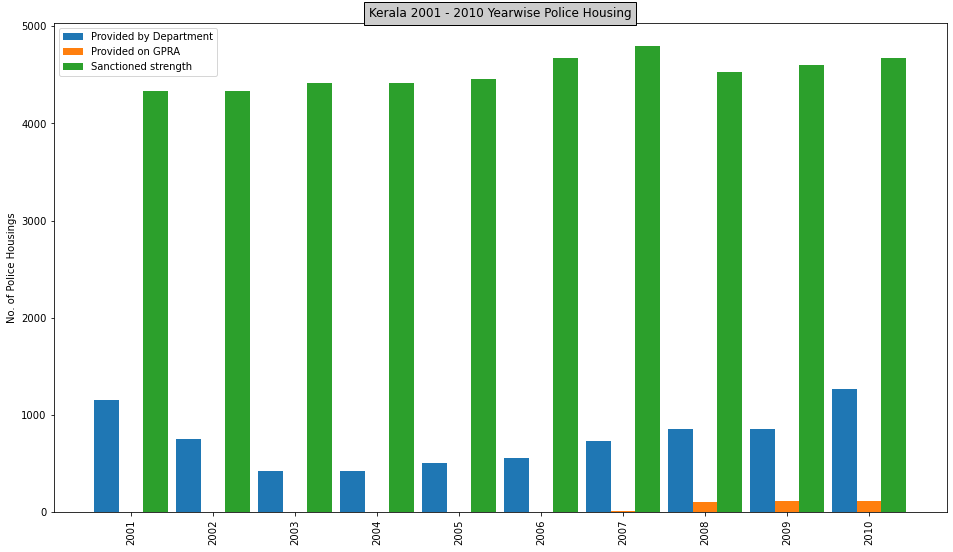

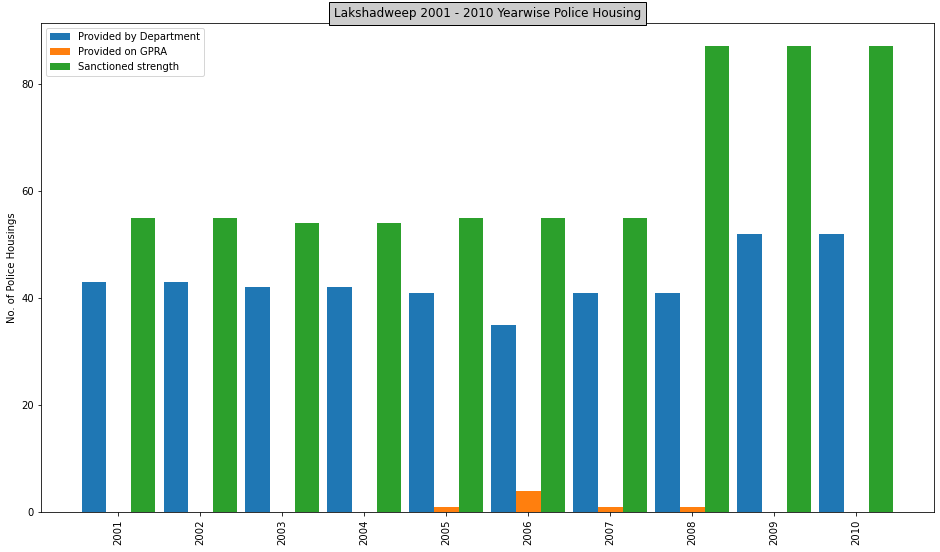

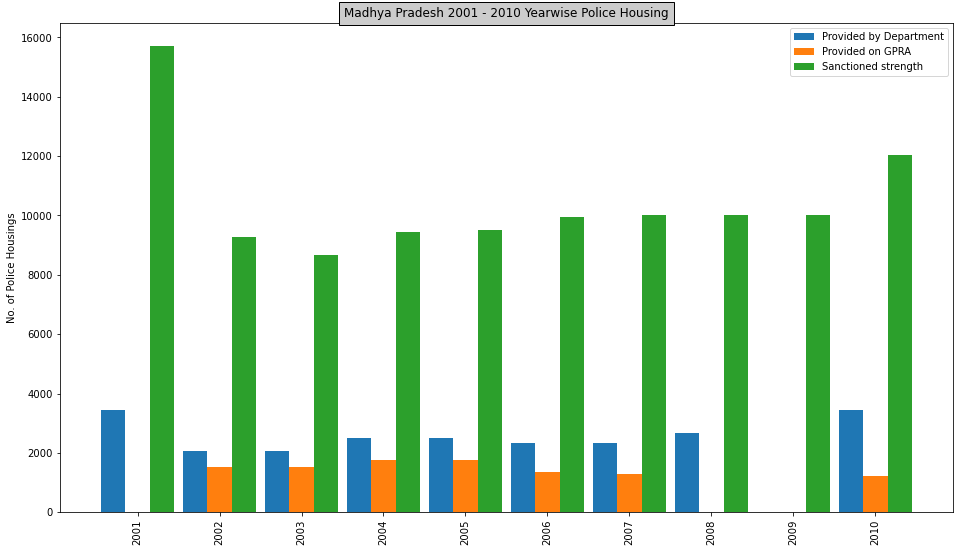

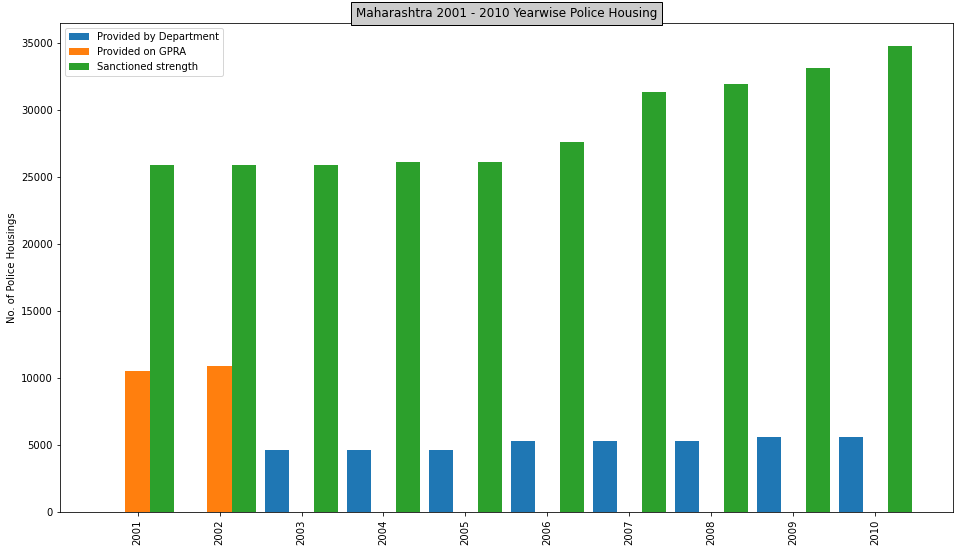

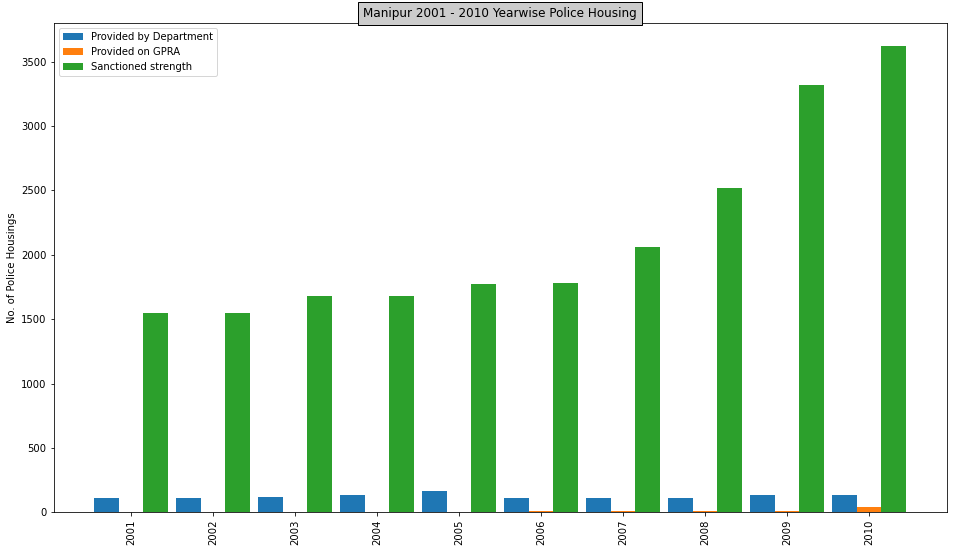

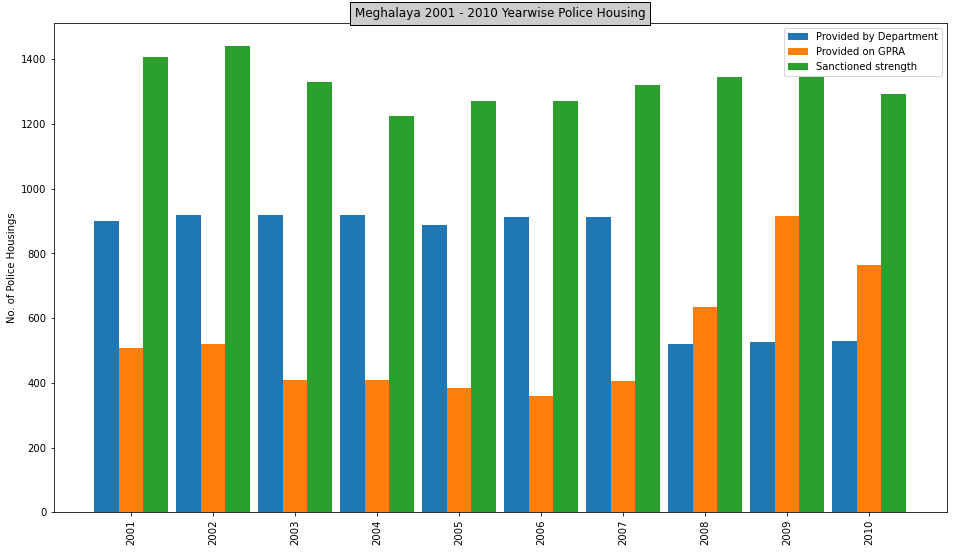

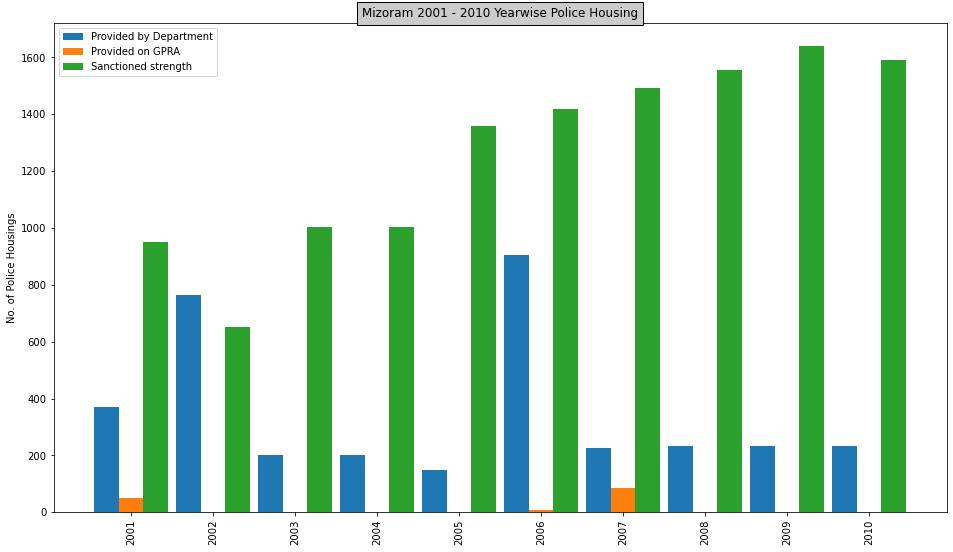

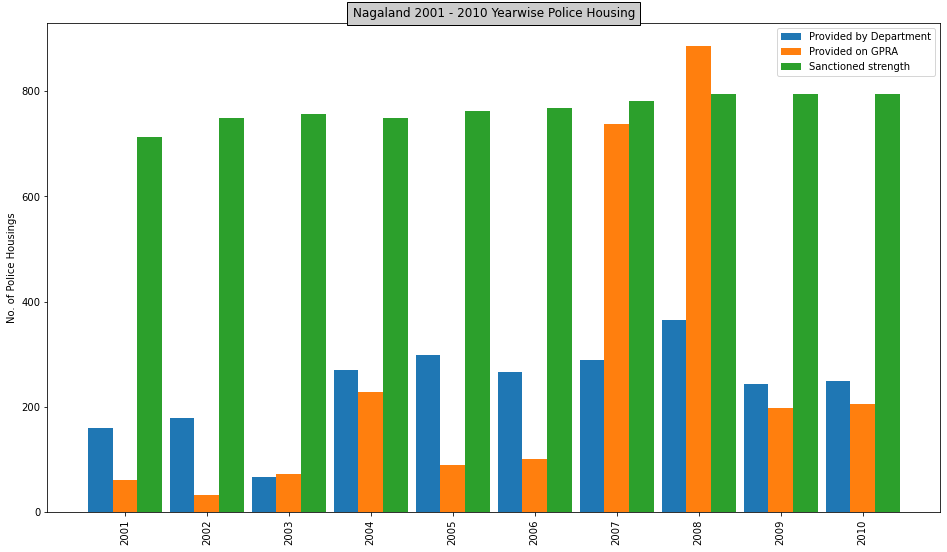

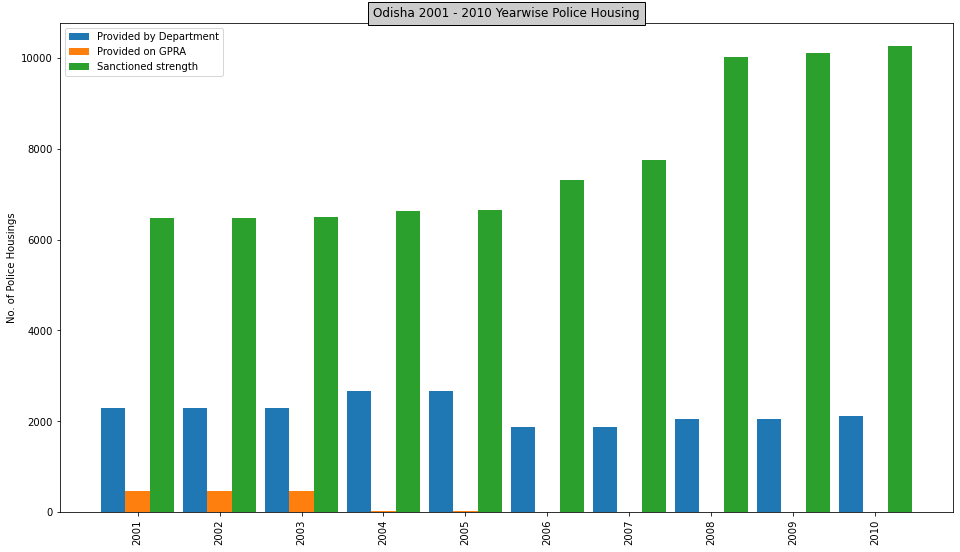

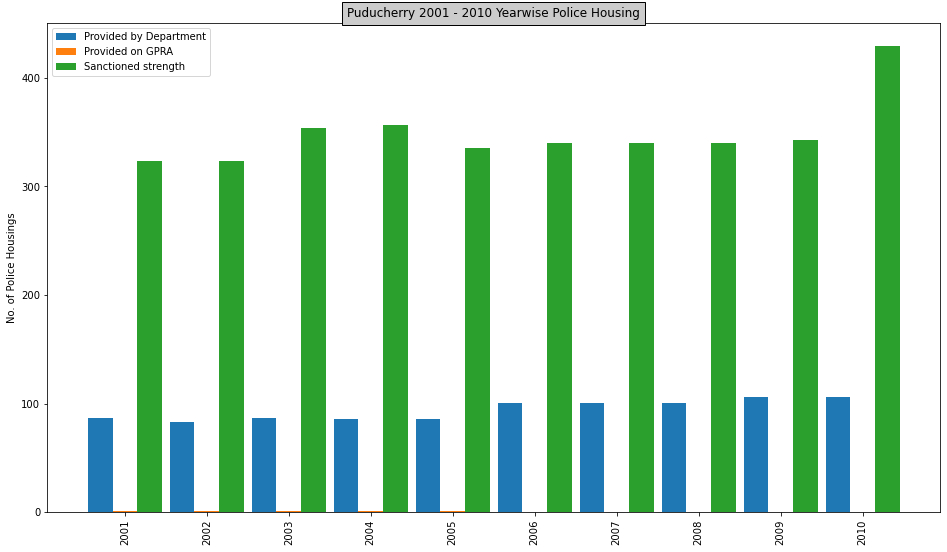

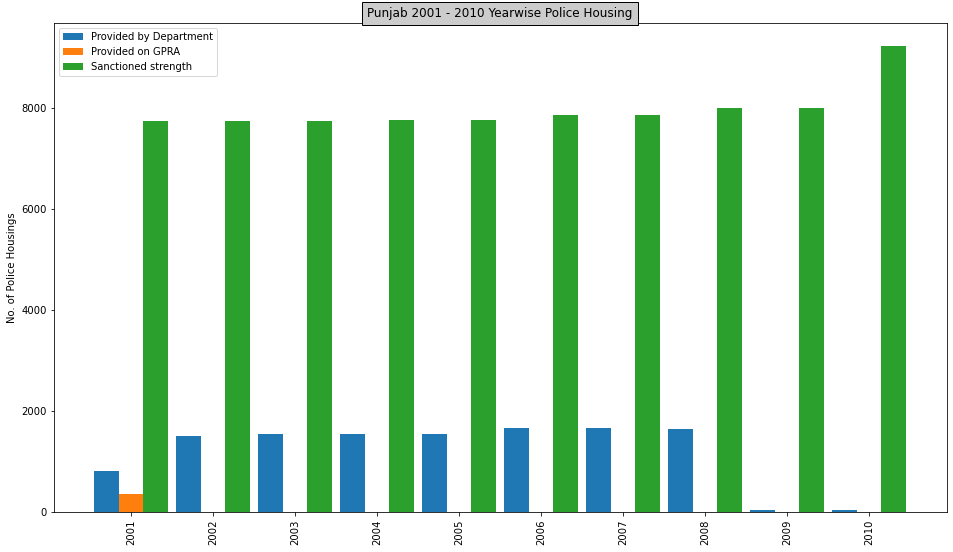

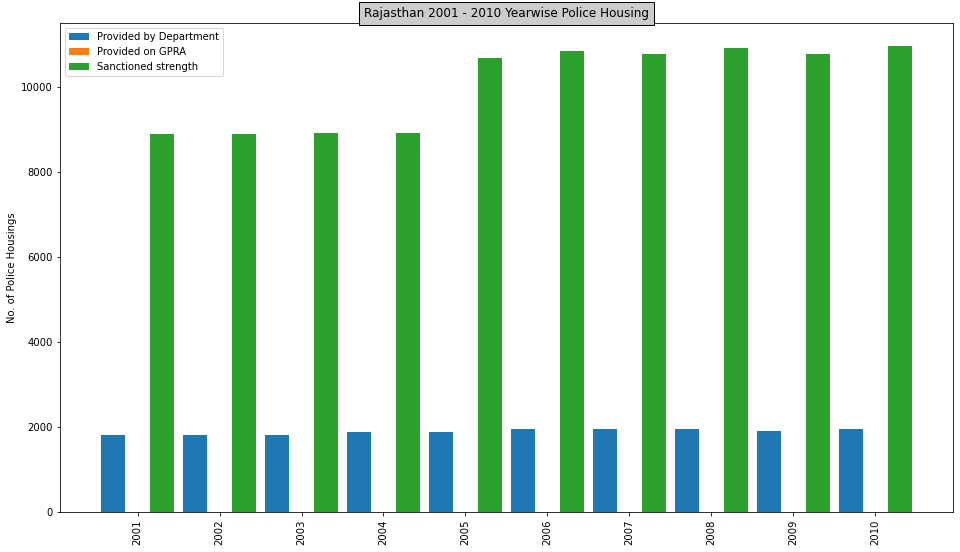

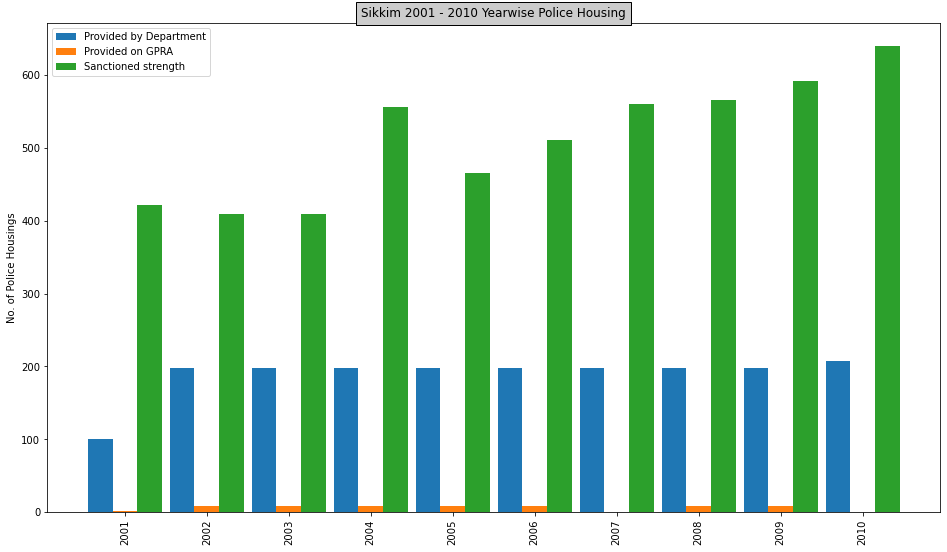

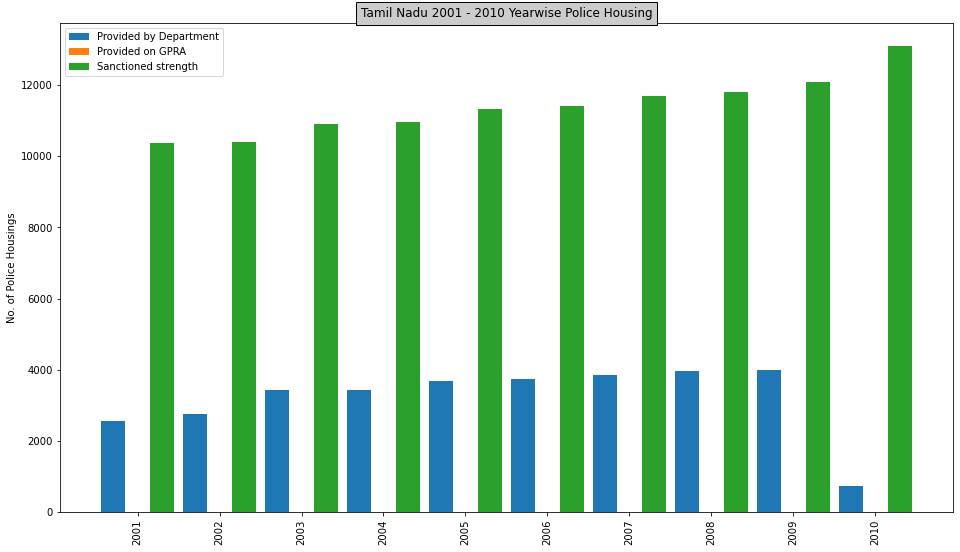

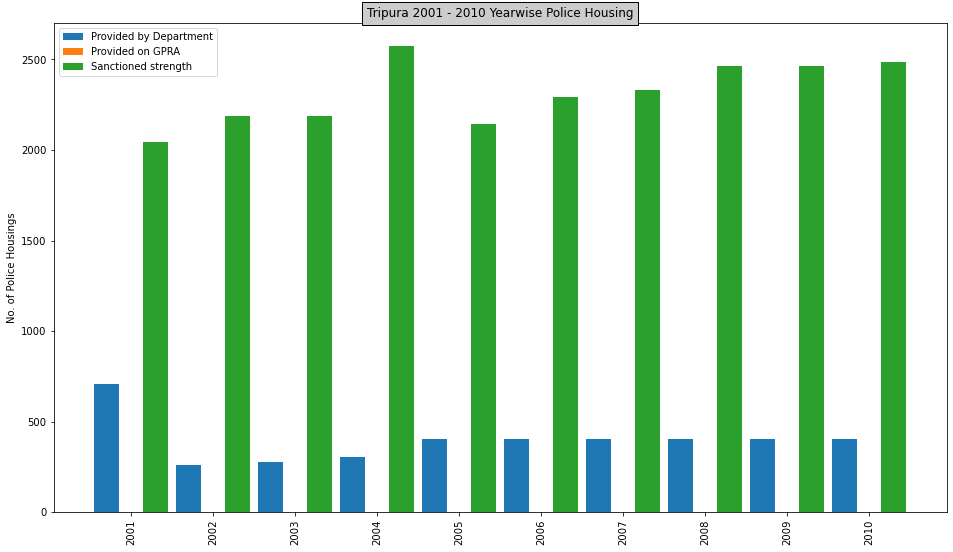

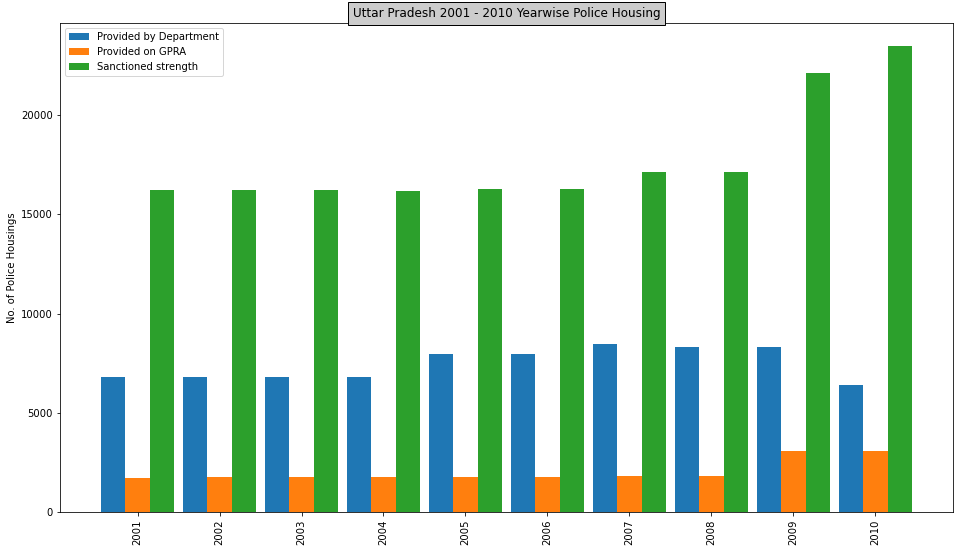

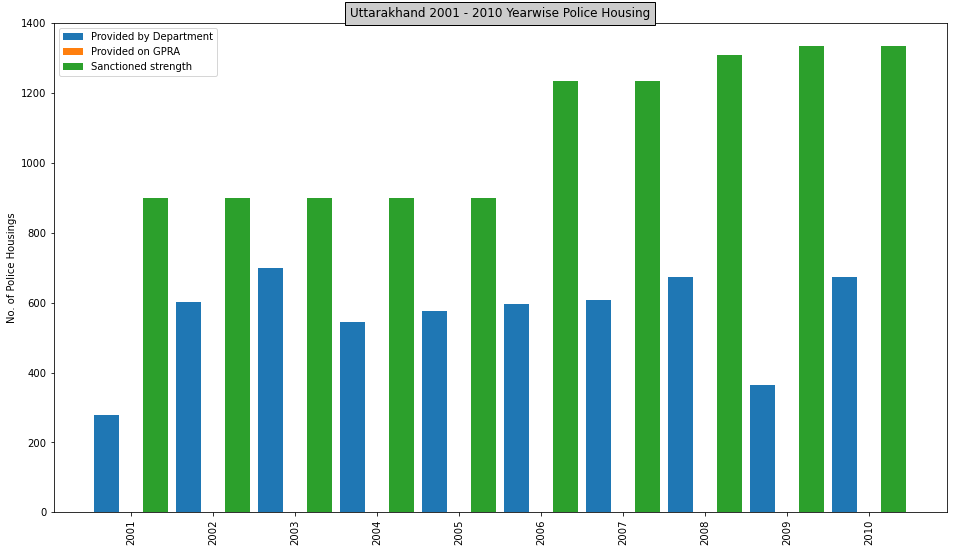

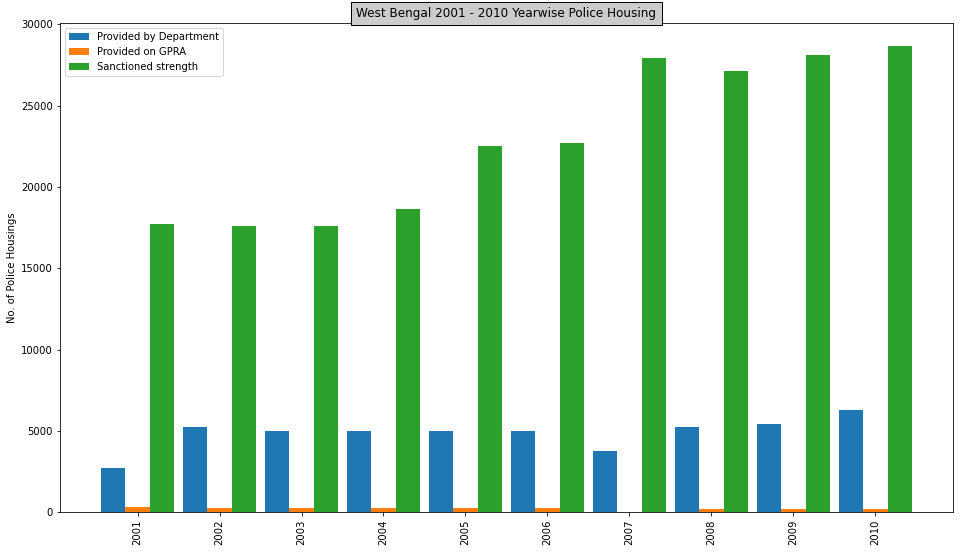

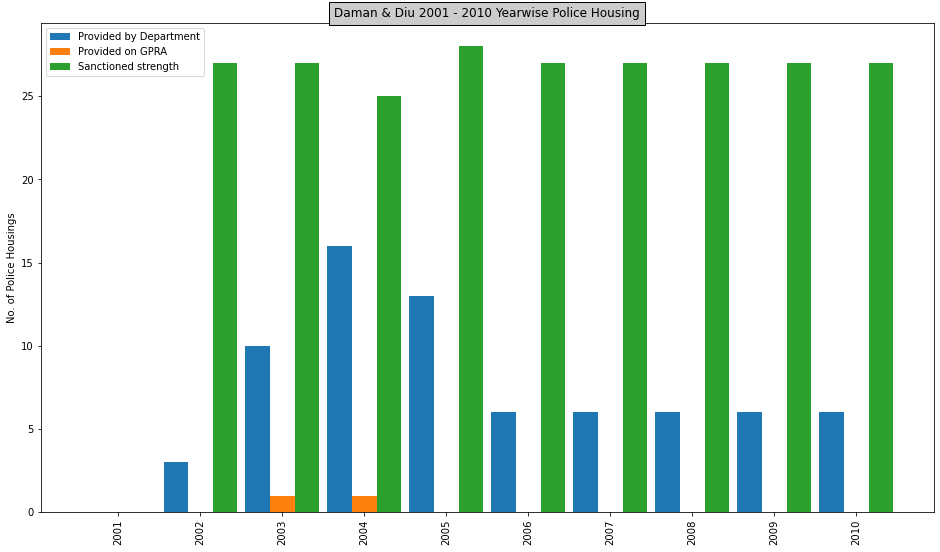

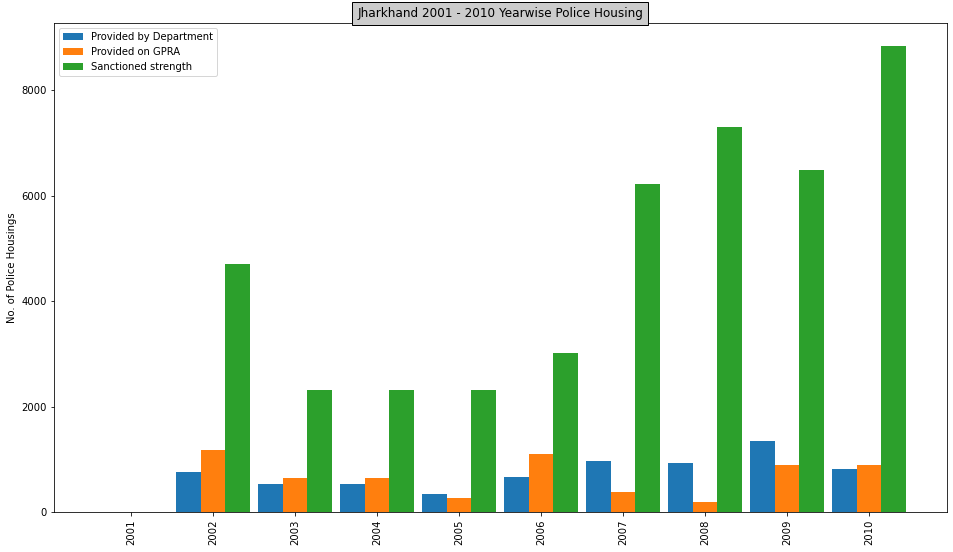

In [9]:
for i in areas:
    plot_details(i)

- <h3><b>2001 - 2010 Intensity of Police Housing [Sanctioned Strength] Statewise</b></h3>

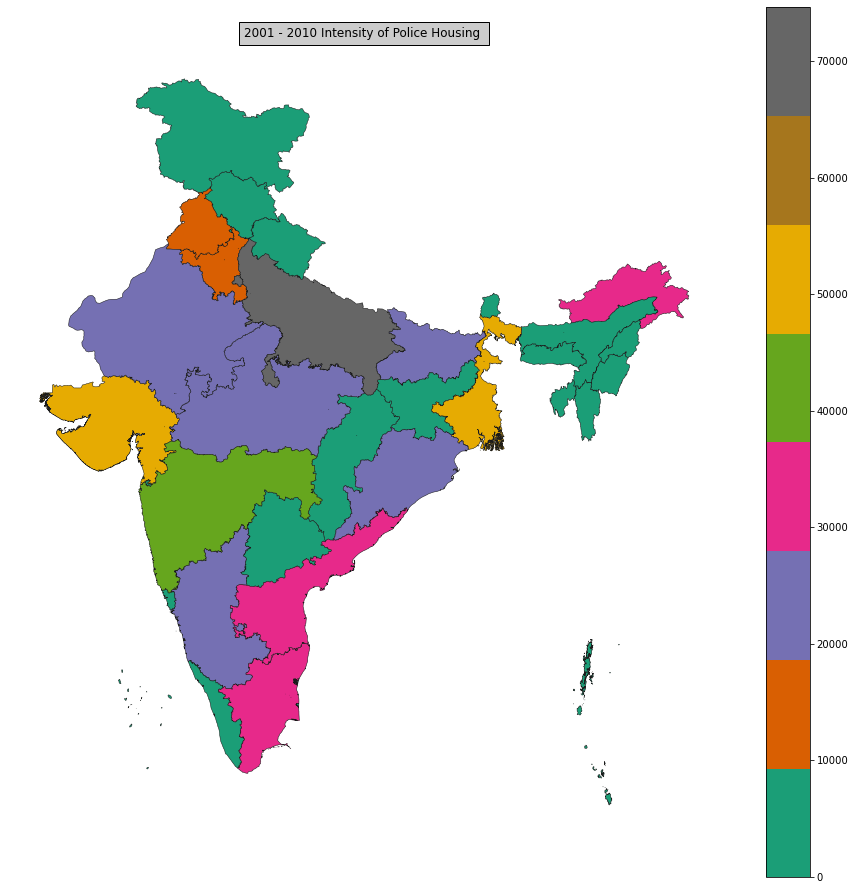

In [10]:
import geopandas as gpd
df = pd.DataFrame(list(zip(areas, housings3)), columns = ['Area_Name', 'Frequency'])
map_file = gpd.read_file('Indian_States.shp')
merged = map_file.set_index('st_nm').join(df.set_index('Area_Name'))
na = ['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Dadara & Nagar Havelli', 
      'NCT of Delhi', 'Telangana']
val = [2950, 29534, 17, 73161, 0]
j = 0
for i in na:
    merged.at[i, list(merged.columns)[1]] = val[j]
    j += 1
merged.iloc[:, -1] = merged.iloc[:, -1].astype(int)
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
ax.set_title('2001 - 2010 Intensity of Police Housing ', bbox={'facecolor':'0.8', 'pad':5}, loc = 'center')
fig = merged.plot(column='Frequency', cmap='Dark2', linewidth=0.5, ax=ax, edgecolor='0.1',legend=True)

<center>For further information or query mail us at <a href = "mailto: aroy02072000@gmail.com">aroy02072000@gmail.com</a></center>


<br><center>&copy; All rights reserved by Webskitters Academy</center>